In [7]:
%matplotlib inline
import numpy as np 
import pandas as pd
from matplotlib import pyplot as plt

In [8]:
nino3 = "http://paos.colorado.edu/research/wavelets/wave_idl/sst_nino3.dat"

In [9]:
nino3 = pd.read_table(nino3)

In [10]:
data = nino3.values.squeeze()

In [11]:
N = data.size; print(N)

503


In [12]:
t0=1871
dt=0.25
units='^{\circ}C'
label='NINO3 SST'

In [13]:
time = np.arange(0, N) * dt + t0

In [14]:
import waipy

In [15]:
data_norm = waipy.normalize(data)

In [16]:
alpha = np.corrcoef(data_norm[0:-1], data_norm[1:])[0,1]; 
print("Lag-1 autocorrelation = {:4.2f}".format(alpha))

Lag-1 autocorrelation = 0.77


In [21]:
result = waipy.cwt(data_norm, 1, 1, 0.25, 2, 0.77, alpha, 6, mother='Morlet', name='test')

256 256


/home/manmeet/.local/lib/python3.5/site-packages/numpy/core/numeric.py:501: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


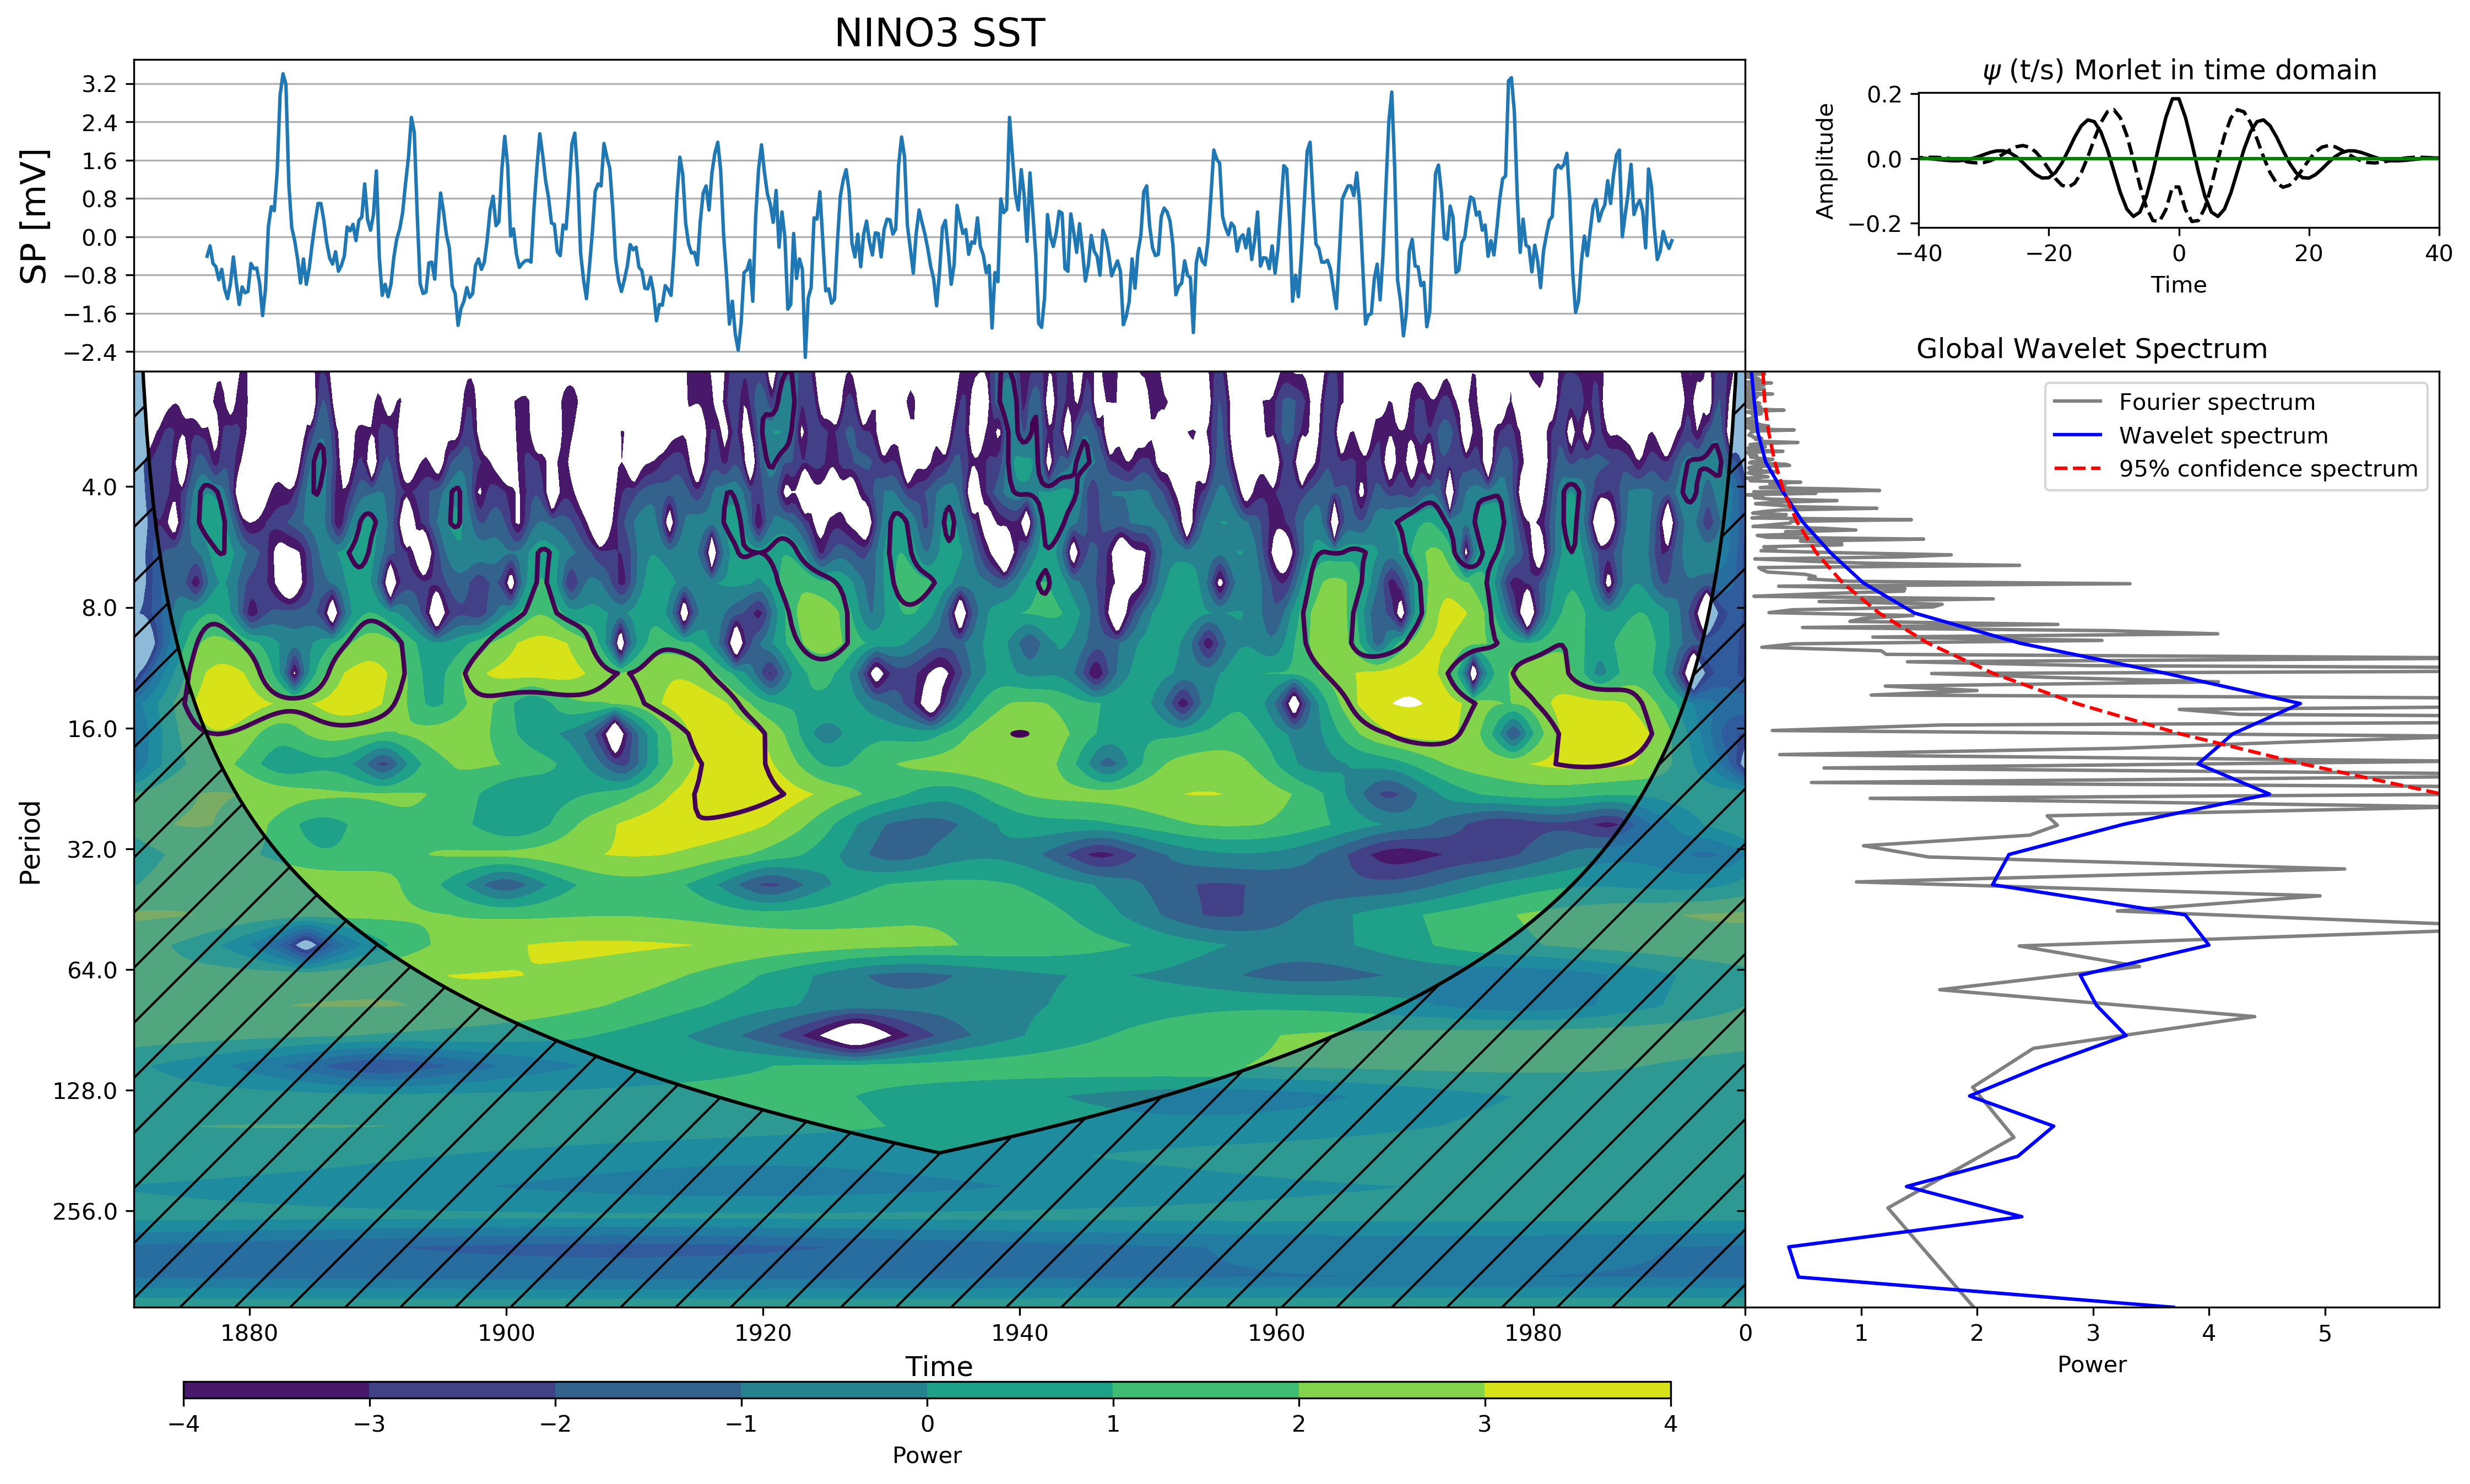

In [22]:
waipy.wavelet_plot(label, time, data_norm, 0.03125, result); 

In [36]:
#result